<a href="https://colab.research.google.com/github/penggunaSendal/irisANNSVM-Assignmen/blob/main/tugas_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import the dataset

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from random import seed, random
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler, label_binarize
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, ParameterGrid, RandomizedSearchCV, learning_curve, ShuffleSplit
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import brier_score_loss, r2_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, classification_report,average_precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_recall_curve, roc_curve
from sklearn.metrics import classification_report, silhouette_score
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

# **Memasukan dataset**

In [ ]:
#create dataframe
df = pd.concat([pd.Series([4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.7,4.8,4.9,5.1,5.1,5.3,5.3,5.5,5.5,5.7,5.8,5.9,6.1],name='x1'),
 pd.Series([1.3,1.3,1.3,1.4,1.6,1.4,1.2,1.5,1.4,1.5,1.8,2.4,1.9,2.3,2.1,1.8,2.3,2.2,2.1,2.5],name='x2'),
 pd.Series(['C1','C1','C1','C1','C1','C1','C1','C1','C1','C1','C2','C2','C2','C2','C2','C2','C2','C2','C2','C2'],name='y')],axis=1)
df['ynew'] = df['y'].map({'C1':0,'C2':1})
df

,x1,x2,y,ynew
0,4.1,1.3,C1,0
1,4.2,1.3,C1,0
2,4.3,1.3,C1,0
3,4.4,1.4,C1,0
4,4.5,1.6,C1,0
5,4.6,1.4,C1,0
6,4.7,1.2,C1,0
7,4.7,1.5,C1,0
8,4.8,1.4,C1,0
9,4.9,1.5,C1,0


# **Memisahkan antara train dan testing**

In [ ]:
y = df['ynew']
X = df.drop(['y','ynew'],axis=1)
X = X.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# 1.A  Design a 2-layer neural network with a bias to be trained to classify data points from C1 and C2 in the table above. Label the nodes in the input and output layers.

In [ ]:
initializer = tf.initializers.RandomUniform(minval=-1, maxval=1, seed=None)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=2, input_dim=2, kernel_initializer=initializer, activation='sigmoid')) #Pembuatan 2 node (input dengan 1 hidden layer)
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid',)) #output dari hidden layer

# 1.B Use backpropagation algorithm to train the networks with learning rate = 0.1 and activation function of sigmoid. Initialize all weights randomly in the range -1 < w < +1. Show the weight values after one iteration of the backpropagation. 

In [ ]:
optimizer = tf.keras.optimizers.Adam(lr=0.1)
model.compile(optimizer=optimizer,loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train, epochs=1, verbose=True)
print('\n')
print("Learning rate", model.optimizer.learning_rate.numpy())
print('Weight yang didapat pada iterasi pertama:')
print(model.weights)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 1s/step - loss: 0.7352 - accuracy: 0.4000


Learning rate 0.1
Weight yang didapat pada iterasi pertama:
[<tf.Variable 'dense_8/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[-0.6967505 ,  0.30479312],
       [ 0.49557742,  0.47834787]], dtype=float32)>, <tf.Variable 'dense_8/bias:0' shape=(2,) dtype=float32, numpy=array([-0.19992301, -0.199949  ], dtype=float32)>, <tf.Variable 'dense_9/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[-0.09900858],
       [-0.17107883]], dtype=float32)>, <tf.Variable 'dense_9/bias:0' shape=(1,) dtype=float32, numpy=array([0.19999586], dtype=float32)>]


# 1.C Repeat (b) for 10 epoch, then plot a learning curve (the training error vs epoch).


In [ ]:
Model = tf.keras.Sequential
model.add(tf.keras.layers.Dense(units=2, input_dim=2, kernel_initializer=initializer, activation='sigmoid')) #Pembuatan 2 node (input dengan 1 hidden layer)
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid',))  #output dari hidden layer
optimizer = tf.keras.optimizers.Adam(lr=0.1)
model.compile(optimizer=optimizer,loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X, y,validation_split = 0.1, epochs=10, batch_size=4)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
5/5 [==============================] - 1s 42ms/step - loss: 0.7371 - accuracy: 0.4444 - val_loss: 0.6780 - val_accuracy: 1.0000
Epoch 2/10
5/5 [==============================] - 0s 7ms/step - loss: 0.6873 - accuracy: 0.5556 - val_loss: 0.8163 - val_accuracy: 0.0000e+00
Epoch 3/10
5/5 [==============================] - 0s 8ms/step - loss: 0.6870 - accuracy: 0.5556 - val_loss: 0.8968 - val_accuracy: 0.0000e+00
Epoch 4/10
5/5 [==============================] - 0s 8ms/step - loss: 0.7091 - accuracy: 0.5556 - val_loss: 1.0133 - val_accuracy: 0.0000e+00
Epoch 5/10
5/5 [==============================] - 0s 7ms/step - loss: 0.7205 - accuracy: 0.5556 - val_loss: 0.8333 - val_accuracy: 0.0000e+00
Epoch 6/10
5/5 [==============================] - 0s 8ms/step - loss: 0.6885 - accuracy: 0.5556 - val_loss: 0.8274 - val_accuracy: 0.0000e+00
Epoch 7/10
5/5 [==============================] - 0s 8ms/step - loss: 0.6889 - accuracy: 0.5556 - val_loss: 0.7738 - val_accuracy: 0.0000e+00
Epoch 8/1

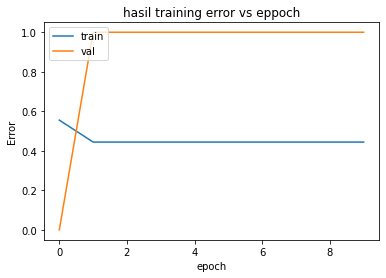

In [ ]:
#hasil
plt.plot([1-i for i in history.history['accuracy']])
plt.plot([1-i for i in history.history['val_accuracy']])
plt.title('hasil training error vs eppoch')
plt.ylabel('Error')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 1.D Plot the region boundary of the categories based on the model;

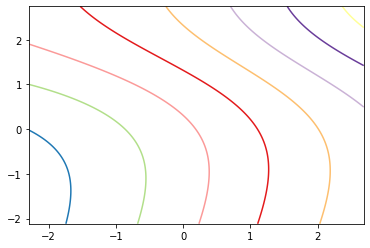

In [ ]:
h = .02 # step size in the mesh
# create a mesh to plot in
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

# 1. E Evaluate performance of the model using confusion matrix: accuracy, recall, F1-score. Write down your conclusions.


In [ ]:
# classification report for precision, recall f1-score and accuracy for train
matrix = classification_report(y_train,np.where(model.predict(X_train)>0.5,1,0))
print('Classification report for train : ')
print('')
print(matrix)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,np.where(model.predict(X_test)>0.5,1,0))
print('Classification report for testing :')
print('')
print(matrix)


Classification report for train : 

              precision    recall  f1-score   support

           0       0.40      1.00      0.57         4
           1       0.00      0.00      0.00         6

    accuracy                           0.40        10
   macro avg       0.20      0.50      0.29        10
weighted avg       0.16      0.40      0.23        10

Classification report for testing :

              precision    recall  f1-score   support

           0       0.60      1.00      0.75         6
           1       0.00      0.00      0.00         4

    accuracy                           0.60        10
   macro avg       0.30      0.50      0.37        10
weighted avg       0.36      0.60      0.45        10



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

# **kesimpulan: dikarenakan data yang sedikit, maka model memiliki tingkat akurat yang cukup tinggi**

# 2. A . Construct a classifier model based on linear-SVM given the dataset above. Train the model for 10 times, then plot a learning curve. Note: You can apply Python machine learning package such as Scikit-learn or TensorFlow;

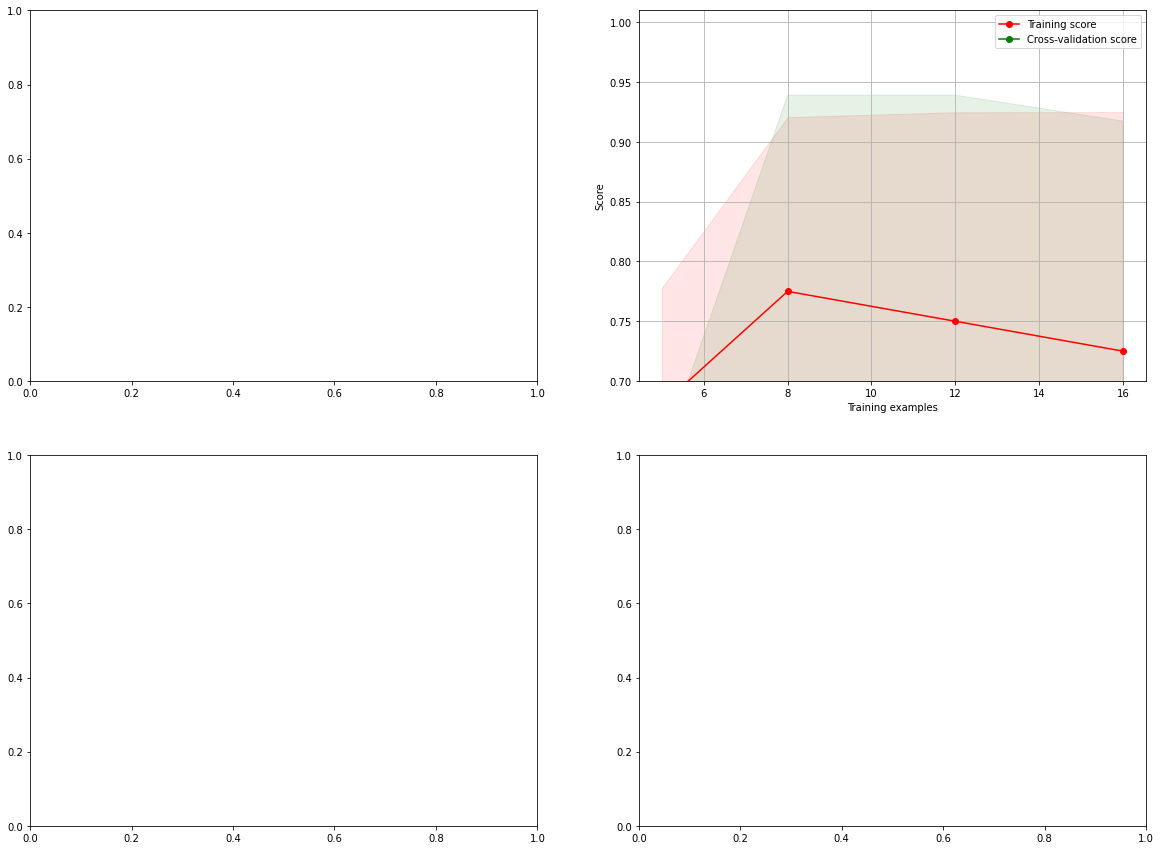

In [ ]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5),):
  if axes is None:
    _, axes = plt.subplots(1, 3, figsize=(20, 5))
    axes[0].set_title(title)
  if ylim is not None:
    axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")
  train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, return_times=True,)
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)
  fit_times_mean = np.mean(fit_times, axis=1)
  fit_times_std = np.std(fit_times, axis=1)

  # Plot learning curve
  axes[0].grid()
  axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r",)
  axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g",)
  axes[0].plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
  axes[0].plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score")
  axes[0].legend(loc="best")
  return plt

fig, axes = plt.subplots(2, 2, figsize=(20, 15))
title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
  
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.7, 1.01), cv=cv, n_jobs=4)
plt.show()

# 2. B Plot the region boundary of the categories based on the model;

In [ ]:
C = 1.0 # SVM regularization parameter
clf = svm.SVC(kernel = 'linear', gamma=0.7, C=C )
clf.fit(X, y)


SVC(gamma=0.7, kernel='linear')

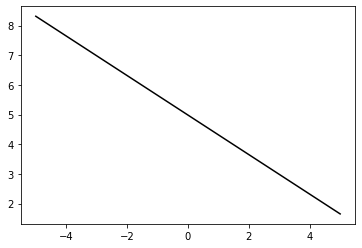

In [ ]:
 w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]
plt.plot(xx, yy, 'k-')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: No contour levels were found within the data range.
  if sys.path[0] == '':


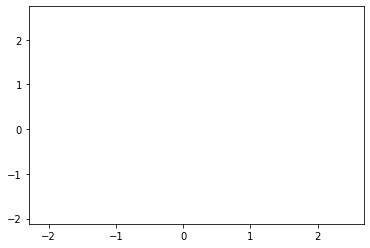

In [ ]:
h = .02 # step size in the mesh
# create a mesh to plot in
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)


# 2. C . Evaluate performance of the model using confusion matrix: accuracy recall, F1-score

In [ ]:
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_train,clf.predict(X_train))
print('Classification report :')
print('')
print(matrix)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,clf.predict(X_test))
print('Classification report :')
print('')
print(matrix)

Classification report :

              precision    recall  f1-score   support

           0       0.40      1.00      0.57         4
           1       0.00      0.00      0.00         6

    accuracy                           0.40        10
   macro avg       0.20      0.50      0.29        10
weighted avg       0.16      0.40      0.23        10

Classification report :

              precision    recall  f1-score   support

           0       0.60      1.00      0.75         6
           1       0.00      0.00      0.00         4

    accuracy                           0.60        10
   macro avg       0.30      0.50      0.37        10
weighted avg       0.36      0.60      0.45        10



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

# 2. D Repeat, but by using soft-margin linear SVM with C = 50. Compare the result with the previous results. Write down your conclusions.

In [ ]:
C = 50 # SVM regularization parameter
clf = svm.SVC(kernel = 'linear', gamma=0.7, C=C )
clf.fit(X, y)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_train,clf.predict(X_train))
print('Classification report :')
print('')
print(matrix)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,clf.predict(X_test))
print('Classification report :')
print('')
print(matrix)

Classification report :

              precision    recall  f1-score   support

           0       0.40      1.00      0.57         4
           1       0.00      0.00      0.00         6

    accuracy                           0.40        10
   macro avg       0.20      0.50      0.29        10
weighted avg       0.16      0.40      0.23        10

Classification report :

              precision    recall  f1-score   support

           0       0.60      1.00      0.75         6
           1       0.00      0.00      0.00         4

    accuracy                           0.60        10
   macro avg       0.30      0.50      0.37        10
weighted avg       0.36      0.60      0.45        10



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

# **kesimpulan: dikarenakan data yang sedikit, membuat model dapat semua case yang ada (baik menggunakan c= 1 maupun c=50)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')